In [1]:
#Small Image Classification Using ANN and CNN

#we will classify small images cifar10 dataset from tensorflow keras datasets.There are total 10 classes as
#shown below. We will use ANN and CNN for classification.

#Import the required modules

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the dataset

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 167s 1us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
#Here we see there are 50000 training images and 1000 test images

y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to 
#now 1D array

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
#Let's plot some images to see what they are

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

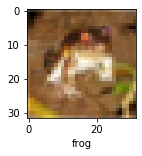

In [10]:
plot_sample(X_train, y_train, 0)

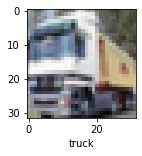

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel
#can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

#Normalizing the training data

X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
#Build simple artificial neural network for image classification

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.8123 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.6232 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.5421 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.4826 - accuracy: 0.4789s - loss: 1.4830 - accura - ETA: 3s - l
Epoch 5/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.4343 - accuracy: 0.4943


In [14]:
#You can see that at the end of 5 epochs, accuracy is at around 49%

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.42      0.52      1000
           1       0.53      0.72      0.61      1000
           2       0.42      0.26      0.32      1000
           3       0.39      0.24      0.30      1000
           4       0.38      0.48      0.43      1000
           5       0.33      0.50      0.40      1000
           6       0.44      0.68      0.53      1000
           7       0.60      0.53      0.56      1000
           8       0.66      0.58      0.62      1000
           9       0.63      0.44      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000



In [15]:
#Now let us build a convolutional neural network to train our images

cnn = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4738 - accuracy: 0.4699
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1056 - accuracy: 0.6135
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9766 - accuracy: 0.6617
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8898 - accuracy: 0.6887
Epoch 5/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8210 - accuracy: 0.71480s - loss: 0.8210 - accuracy: 0.71
Epoch 6/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7651 - accuracy: 0.7332
Epoch 7/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.7124 - accuracy: 0.7516
Epoch 8/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.6755 - accuracy: 0.7626
Epoch 9/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.6253 - accuracy: 0.7823
Epoch 10/10
1563/1563 [=======

In [18]:
#With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. 
#CNN's are best for image classification and gives superb accuracy.Also computation is much less compared 
#to simple ANN as maxpooling reduces the image dimensions while still preserving the features.

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9590 - accuracy: 0.6887


[0.9590418934822083, 0.6887000203132629]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.31180177e-03, 1.62306060e-05, 9.35998093e-03, 7.44149864e-01,
        2.89176614e-03, 3.10905725e-02, 2.41772141e-05, 9.29833404e-05,
        2.10056007e-01, 6.52114932e-06],
       [2.63405731e-04, 3.09522008e-03, 3.91827683e-07, 4.31225885e-07,
        9.61158098e-11, 6.07892209e-11, 2.52312277e-12, 1.84314314e-10,
        9.96630251e-01, 1.03084440e-05],
       [8.70621130e-02, 2.39110105e-02, 1.96511089e-03, 1.50381599e-03,
        6.62319217e-05, 4.23466081e-05, 9.62187914e-06, 3.07720329e-04,
        8.64672840e-01, 2.04591155e-02],
       [8.12060297e-01, 4.31558397e-03, 1.22119943e-02, 5.11458591e-02,
        7.97384419e-04, 4.05313804e-05, 1.62364940e-05, 3.59832053e-03,
        1.14356503e-01, 1.45729119e-03],
       [3.07161531e-06, 1.36232775e-05, 1.10949039e-01, 2.34476272e-02,
        4.97643530e-01, 4.27744398e-03, 3.63623828e-01, 5.39254961e-06,
        3.47852074e-05, 1.79791857e-06]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

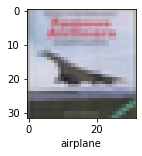

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'airplane'

In [25]:
classes[y_classes[3]]

'airplane'

In [27]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.85      0.79      0.82      1000
           2       0.55      0.64      0.59      1000
           3       0.48      0.56      0.51      1000
           4       0.73      0.53      0.62      1000
           5       0.59      0.60      0.60      1000
           6       0.86      0.67      0.75      1000
           7       0.70      0.77      0.73      1000
           8       0.77      0.81      0.79      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

